**<h1>Exploratory Data Analysis Los Angels Crime Dataset(2020)<h1>**


In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<h1>Data Exploration<h1>

In [2]:
#reading csv
df= pd.read_csv('crime_data.csv')

In [3]:
#dataset overview
df.head()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


In [4]:
#checking shape of dataset
df.shape

(499, 13)

In [5]:
#checking datatypes and respective column count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DR_NO        499 non-null    int64  
 1   Date_Rptd    499 non-null    object 
 2   DATE_OCC     499 non-null    object 
 3   AREA_NAME    499 non-null    object 
 4   Crm_Cd       499 non-null    int64  
 5   Crm_Cd_Desc  499 non-null    object 
 6   Vict_Age     499 non-null    int64  
 7   Vict_Sex     472 non-null    object 
 8   Premis_Desc  499 non-null    object 
 9   Status       499 non-null    object 
 10  Location     499 non-null    object 
 11  LAT          499 non-null    float64
 12  LON          499 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 50.8+ KB


In [6]:
#checking null values
df.isnull().sum()

DR_NO           0
Date_Rptd       0
DATE_OCC        0
AREA_NAME       0
Crm_Cd          0
Crm_Cd_Desc     0
Vict_Age        0
Vict_Sex       27
Premis_Desc     0
Status          0
Location        0
LAT             0
LON             0
dtype: int64

In [7]:
#checking duplicate values
df.duplicated().sum()

0

In [8]:
#checking statistics of numeric col
df.describe()

,DR_NO,Crm_Cd,Vict_Age,LAT,LON
count,4.990000e+02,499.000000,499.000000,499.000000,499.000000
mean,1.999930e+08,504.178357,32.142285,34.047335,-118.261283
std,8.742243e+06,198.381863,20.202136,0.053840,0.041560
min,1.030447e+07,210.000000,0.000000,33.710000,-118.560000
25%,2.001044e+08,330.000000,23.000000,34.040000,-118.260000
50%,2.001048e+08,442.000000,31.000000,34.050000,-118.250000
75%,2.001064e+08,624.000000,46.500000,34.050000,-118.240000
max,2.220130e+08,956.000000,78.000000,34.280000,-118.190000


In [9]:
#getting numeric col
numeric_col=df.select_dtypes(exclude='object').columns
print('Numeric Columns:')
numeric_col

Numeric Columns:


Index(['DR_NO', 'Crm_Cd', 'Vict_Age', 'LAT', 'LON'], dtype='object')

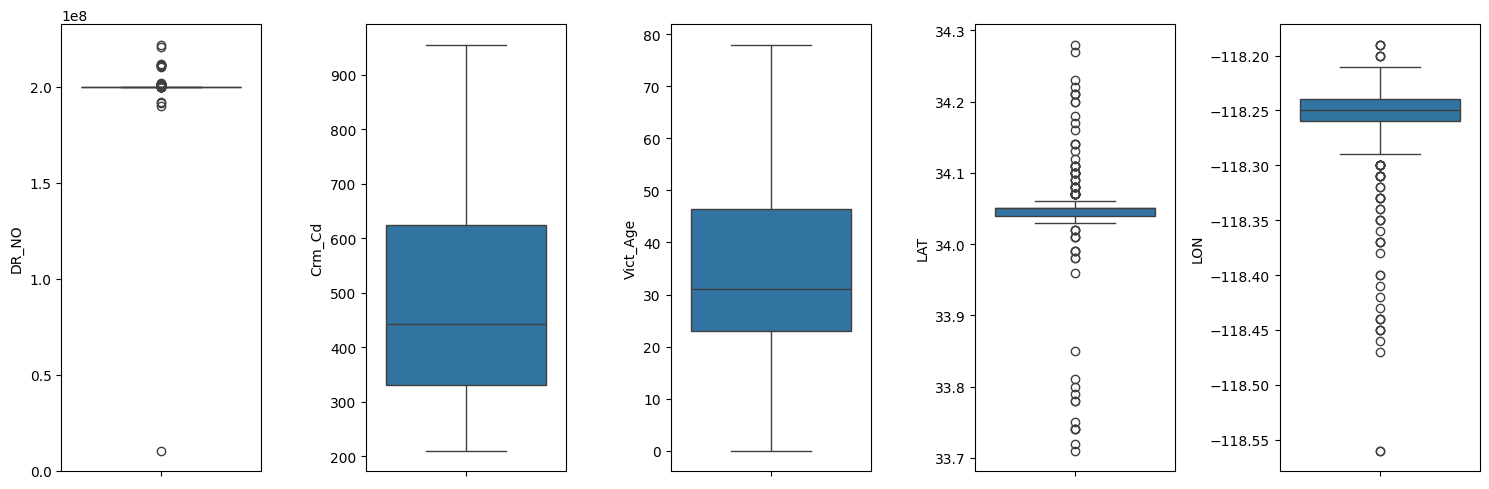

In [10]:
#checking outliers
fig, axes= plt.subplots(1, len(numeric_col), figsize=(15,5))
for i in range(len(numeric_col)):
  sns.boxplot(df[numeric_col[i]], ax=axes[i])
plt.tight_layout()
plt.show()

In [11]:
#gettinng categorical col
print('Categorical Columns:')
df.select_dtypes(include='object').columns

Categorical Columns:


Index(['Date_Rptd', 'DATE_OCC', 'AREA_NAME', 'Crm_Cd_Desc', 'Vict_Sex',
       'Premis_Desc', 'Status', 'Location'],
      dtype='object')

<h1>Data Preprocessing<h1>

In [12]:
mode=df['Vict_Sex'].mode()

In [13]:
#replacing null values
df['Vict_Sex'].fillna(mode[0],inplace=True)

In [14]:
df.isnull().sum()

DR_NO          0
Date_Rptd      0
DATE_OCC       0
AREA_NAME      0
Crm_Cd         0
Crm_Cd_Desc    0
Vict_Age       0
Vict_Sex       0
Premis_Desc    0
Status         0
Location       0
LAT            0
LON            0
dtype: int64

In [15]:
#drop irrelevant col for analysis
df.drop(['DR_NO'],axis=1,inplace=True)

In [16]:
#changing datatype of date columns to date
df['Date_Rptd']=pd.to_datetime(df['Date_Rptd'])
df['DATE_OCC']=pd.to_datetime(df['DATE_OCC'])

In [17]:
#extractng month and year from date columns
df['Year_Rptd']=df['Date_Rptd'].dt.year
df['Month_Rptd']=df['Date_Rptd'].dt.month
df['Year_Occ']=df['DATE_OCC'].dt.year
df['Month_Occ']=df['DATE_OCC'].dt.month

In [18]:
#dropping date columns
df.drop(['Date_Rptd','DATE_OCC'],axis=1,inplace=True)

In [19]:
#checking unique Area_Names in dataset
df['AREA_NAME'].unique()

array(['Southwest', 'Central', 'N Hollywood', 'Mission', 'Van Nuys',
       'Wilshire', 'Rampart', 'Harbor', 'Pacific', 'Hollenbeck',
       'West LA', 'Northeast', 'Foothill', 'Hollywood', 'West Valley',
       '77th Street', 'Olympic', 'Devonshire', 'Southeast'], dtype=object)

In [20]:
#checking unique Crime_Code in dataset
df['Crm_Cd'].unique()

array([624, 745, 740, 442, 946, 341, 330, 930, 648, 354, 230, 761, 350,
       310, 480, 623, 440, 510, 210, 900, 888, 420, 886, 421, 647, 940,
       662, 220, 625, 755, 649, 901, 320, 890, 351, 956, 820, 812, 920,
       850, 666, 343])

In [21]:
#checking unique Crime_Code_Description in dataset
df['Crm_Cd_Desc'].unique()

array(['BATTERY - SIMPLE ASSAULT',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'OTHER MISCELLANEOUS CRIME',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BURGLARY FROM VEHICLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'ARSON', 'THEFT OF IDENTITY',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'BRANDISH WEAPON', 'THEFT, PERSON', 'BURGLARY', 'BIKE - STOLEN',
       'BATTERY POLICE (SIMPLE)', 'THEFT PLAIN - PETTY ($950 & UNDER)',
       'VEHICLE - STOLEN', 'ROBBERY', 'VIOLATION OF COURT ORDER',
       'TRESPASSING', 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'DISTURBING THE PEACE', 'THEFT FROM MOTOR VEHICLE - ATTEMPT',
       'THROWING OBJECT AT MOVING VEHICLE', 'EXTORTION',
       'BUNCO, GRAND THEFT', 'ATTEMPTED ROBBERY', 'OTHER ASSAULT',
       'BOMB SCARE', 'DOCUMENT FORGERY / STOLEN FE

In [22]:
#splitting colm in order to extract valuable info and simplify things
df['Crm_Cd_Desc'].str.split('(').str[0].unique()

array(['BATTERY - SIMPLE ASSAULT', 'VANDALISM - MISDEAMEANOR ',
       'VANDALISM - FELONY ', 'SHOPLIFTING - PETTY THEFT ',
       'OTHER MISCELLANEOUS CRIME', 'THEFT-GRAND ',
       'BURGLARY FROM VEHICLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'ARSON', 'THEFT OF IDENTITY',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'BRANDISH WEAPON', 'THEFT, PERSON', 'BURGLARY', 'BIKE - STOLEN',
       'BATTERY POLICE ', 'THEFT PLAIN - PETTY ', 'VEHICLE - STOLEN',
       'ROBBERY', 'VIOLATION OF COURT ORDER', 'TRESPASSING',
       'THEFT FROM MOTOR VEHICLE - PETTY ', 'DISTURBING THE PEACE',
       'THEFT FROM MOTOR VEHICLE - ATTEMPT',
       'THROWING OBJECT AT MOVING VEHICLE', 'EXTORTION',
       'BUNCO, GRAND THEFT', 'ATTEMPTED ROBBERY', 'OTHER ASSAULT',
       'BOMB SCARE', 'DOCUMENT FORGERY / STOLEN FELONY',
       'VIOLATION OF RESTRAINING ORDER', 'BURGLARY, ATTEMPTED',
       'FAILURE TO YIELD', 'PURSE SNATCHING',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',

In [23]:
#checking count in order to club less occouring crimes into one
X=df['Crm_Cd_Desc'].str.split('(').str[0]
X.value_counts()

Crm_Cd_Desc
BURGLARY FROM VEHICLE                             82
BATTERY - SIMPLE ASSAULT                          74
THEFT PLAIN - PETTY                               44
SHOPLIFTING - PETTY THEFT                         28
VEHICLE - STOLEN                                  28
THEFT-GRAND                                       26
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    24
VANDALISM - FELONY                                23
VANDALISM - MISDEAMEANOR                          23
TRESPASSING                                       19
BURGLARY                                          16
ROBBERY                                           12
BIKE - STOLEN                                     11
THEFT OF IDENTITY                                 10
THEFT FROM MOTOR VEHICLE - PETTY                   9
THEFT, PERSON                                      9
CRIMINAL THREATS - NO WEAPON DISPLAYED             7
BATTERY POLICE                                     5
BRANDISH WEAPON                   

In [24]:
#clubbing existing values into new categories using lambda function
df['Crm_Cd_Desc']=X.apply(lambda x: 'BURGLARY' if 'BURGLARY' in x or 'ROBBERY' in x else 'SHOPLIFTING' if 'SHOPLIFTING' in x else 'THEFT' if 'THEFT' in x or 'STOLEN' in x else 'VANDALISM' if 'VANDALISM' in x else 'ASSAULT' if 'ASSAULT' in x else x if 'TRESPASSING' in x else 'OTHER HENIOUS CRIMES')
df['Crm_Cd_Desc'].value_counts()

Crm_Cd_Desc
THEFT                   144
BURGLARY                116
ASSAULT                 100
VANDALISM                46
OTHER HENIOUS CRIMES     45
SHOPLIFTING              29
TRESPASSING              19
Name: count, dtype: int64

In [25]:
#checking categories and their respective crime_codes
df['Crm_Cd'].groupby(df['Crm_Cd_Desc']).value_counts()

Crm_Cd_Desc           Crm_Cd
ASSAULT               624       74
                      230       24
                      625        2
BURGLARY              330       82
                      310       16
                      210       12
                      220        4
                      320        2
OTHER HENIOUS CRIMES  930        7
                      623        5
                      761        5
                      946        4
                      901        3
                      648        3
                      900        2
                      351        2
                      886        2
                      850        2
                      956        2
                      890        1
                      820        1
                      812        1
                      755        1
                      666        1
                      647        1
                      940        1
                      920        1
SHOPLIFTING           442 

In [26]:
#checking distribution of age column
df['Vict_Age'].describe()

count    499.000000
mean      32.142285
std       20.202136
min        0.000000
25%       23.000000
50%       31.000000
75%       46.500000
max       78.000000
Name: Vict_Age, dtype: float64

In [27]:
#replaccing age 0 with mean of age as 0 age not makes any sense
df['Vict_Age'].replace(0,32, inplace=True)

In [28]:
#value counts of gender column
df['Vict_Sex'].value_counts()

Vict_Sex
M    305
F    155
X     39
Name: count, dtype: int64

In [29]:
#checking unique values of premis
df['Premis_Desc'].unique()

array(['SINGLE FAMILY DWELLING', 'SIDEWALK',
       'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
       'BEAUTY SUPPLY STORE', 'DEPARTMENT STORE', 'POLICE FACILITY',
       'STREET', 'PARKING LOT', 'HOTEL',
       "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)",
       'CONDOMINIUM/TOWNHOUSE', 'OTHER BUSINESS',
       'VEHICLE, PASSENGER/TRUCK', 'OTHER STORE', 'RESTAURANT/FAST FOOD',
       'MTA - RED LINE - PERSHING SQUARE',
       'NIGHT CLUB (OPEN EVENINGS ONLY)', 'DRUG STORE', 'GARAGE/CARPORT',
       'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)',
       "SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS",
       'PARKING UNDERGROUND/BUILDING', 'DRIVEWAY', 'MARKET',
       'LA UNION STATION (NOT LINE SPECIFIC)', 'MISSIONS/SHELTERS',
       'BAR/COCKTAIL/NIGHTCLUB', 'DETENTION/JAIL FACILITY',
       'OTHER PREMISE', 'CLOTHING STORE', 'BANK', 'MTA BUS',
       'MTA - BLUE LINE - 7TH AND METRO CENTER', 'OTHER/OUTSIDE',
       'STAPLES CENTER *', 'CONSTRUCTION SITE', 'MEDICAL

In [30]:
# checking value count of Premis in order to decide clubbing conditon
df['Premis_Desc'].value_counts().head(25)

Premis_Desc
STREET                                                105
SIDEWALK                                               62
PARKING LOT                                            46
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)           45
SINGLE FAMILY DWELLING                                 25
VEHICLE, PASSENGER/TRUCK                               21
OTHER BUSINESS                                         19
DEPARTMENT STORE                                       17
OTHER STORE                                            14
LA UNION STATION (NOT LINE SPECIFIC)                   13
RESTAURANT/FAST FOOD                                   12
PARKING UNDERGROUND/BUILDING                           10
NIGHT CLUB (OPEN EVENINGS ONLY)                         9
GARAGE/CARPORT                                          6
STAPLES CENTER *                                        6
MISSIONS/SHELTERS                                       5
LIBRARY                                                 5
DR

In [31]:
#creating func to club premis having count <5 into single category
def premis(x):
  if df['Premis_Desc'].where(df['Premis_Desc']==x).value_counts()[0]<5:
    return 'OTHER(Driveway, Market, Bus etc.)'
  else:
    return x

In [32]:
#applying function to premis values
df['Premis_Desc']=df['Premis_Desc'].apply(premis)

In [33]:
# vewing value counts after clubbing
df['Premis_Desc'].value_counts()

Premis_Desc
STREET                                          105
OTHER(Driveway, Market, Bus etc.)                79
SIDEWALK                                         62
PARKING LOT                                      46
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     45
SINGLE FAMILY DWELLING                           25
VEHICLE, PASSENGER/TRUCK                         21
OTHER BUSINESS                                   19
DEPARTMENT STORE                                 17
OTHER STORE                                      14
LA UNION STATION (NOT LINE SPECIFIC)             13
RESTAURANT/FAST FOOD                             12
PARKING UNDERGROUND/BUILDING                     10
NIGHT CLUB (OPEN EVENINGS ONLY)                   9
GARAGE/CARPORT                                    6
STAPLES CENTER *                                  6
MISSIONS/SHELTERS                                 5
LIBRARY                                           5
Name: count, dtype: int64

In [34]:
#checking unique values in status
df['Status'].unique()

array(['AO', 'IC', 'AA', 'JO'], dtype=object)

In [35]:
#checking unique values in location
df['Location'].unique()

array(['1100 W 39TH PL', '700 S HILL ST', '5400 CORTEEN PL',
       '14400 TITUS ST', '700 S FIGUEROA ST', '200 E 6TH ST',
       '700 BERNARD ST', '800 N ALAMEDA ST', '800 S OLIVE ST',
       '700 W 7TH ST', '100 S LOS ANGELES ST', '13600 LEADWELL ST', '8TH',
       'WALL', '800 N BROADWAY', '400 S SPRING ST', '300 W 5TH ST',
       '1800 S MAIN ST', '600 W 7TH ST', '700 ALPINE ST',
       '6200 SYLMAR AV', '100 E 5TH ST', '1200 E 7TH ST',
       '700 S FLOWER ST', '300 E 3RD ST', '1ST', '1200 S GRAND AV',
       '300 S GRAND AV', '600 S CENTRAL AV', '600 N BROADWAY',
       '800 W 7TH ST', '7TH ST', '23400 PRESIDENT AV', '13100 LAKE ST',
       '100 W 1ST ST', '3RD', '6TH', '1600 S HOPE ST',
       '600 S SAN PEDRO ST', '100 W 2ND ST', '4TH', '700 S GRAND AV',
       '5TH', 'PALMETTO', '800 JAMES M WOOD BL', 'GRAND',
       '200 N AVENUE 25', '500 SAN JULIAN ST', '43RD ST',
       '100 PASEO DE LA PLAZA', '500 S SAN PEDRO ST',
       '1300 S LOS ANGELES ST', '800 S FIGUEROA ST', 'JES

In [36]:
#creating func in order to categories location in east west north south and central region in order to simplify things
def locations(x):
  if x.find(' ')!=-1 and x.split(' ')[1]=='E':
    return 'EAST'
  elif x.find(' ')!=-1 and x.split(' ')[1]=='W':
    return 'WEST'
  elif x.find(' ')!=-1 and x.split(' ')[1]=='N':
    return 'NORTH'
  elif x.find(' ')!=-1 and x.split(' ')[1]=='S':
    return 'SOUTH'
  else:
    return 'Central'


In [37]:
#applying func to location values
df['Location']=df['Location'].apply(locations)

In [38]:
#checking values counts after clubbing
df['Location'].value_counts()

Location
Central    229
SOUTH      128
WEST        81
NORTH       36
EAST        25
Name: count, dtype: int64

In [39]:
#checking distribution of latitude
df['LAT'].describe()

count    499.000000
mean      34.047335
std        0.053840
min       33.710000
25%       34.040000
50%       34.050000
75%       34.050000
max       34.280000
Name: LAT, dtype: float64

In [40]:
#checking distribution of longitude
df['LON'].describe()

count    499.000000
mean    -118.261283
std        0.041560
min     -118.560000
25%     -118.260000
50%     -118.250000
75%     -118.240000
max     -118.190000
Name: LON, dtype: float64

In [41]:
#overview of dataset after preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AREA_NAME    499 non-null    object 
 1   Crm_Cd       499 non-null    int64  
 2   Crm_Cd_Desc  499 non-null    object 
 3   Vict_Age     499 non-null    int64  
 4   Vict_Sex     499 non-null    object 
 5   Premis_Desc  499 non-null    object 
 6   Status       499 non-null    object 
 7   Location     499 non-null    object 
 8   LAT          499 non-null    float64
 9   LON          499 non-null    float64
 10  Year_Rptd    499 non-null    int32  
 11  Month_Rptd   499 non-null    int32  
 12  Year_Occ     499 non-null    int32  
 13  Month_Occ    499 non-null    int32  
dtypes: float64(2), int32(4), int64(2), object(6)
memory usage: 46.9+ KB


<h1>Exploratory Data Analysis<h1>

<h2>Univariate Analysis<h2>

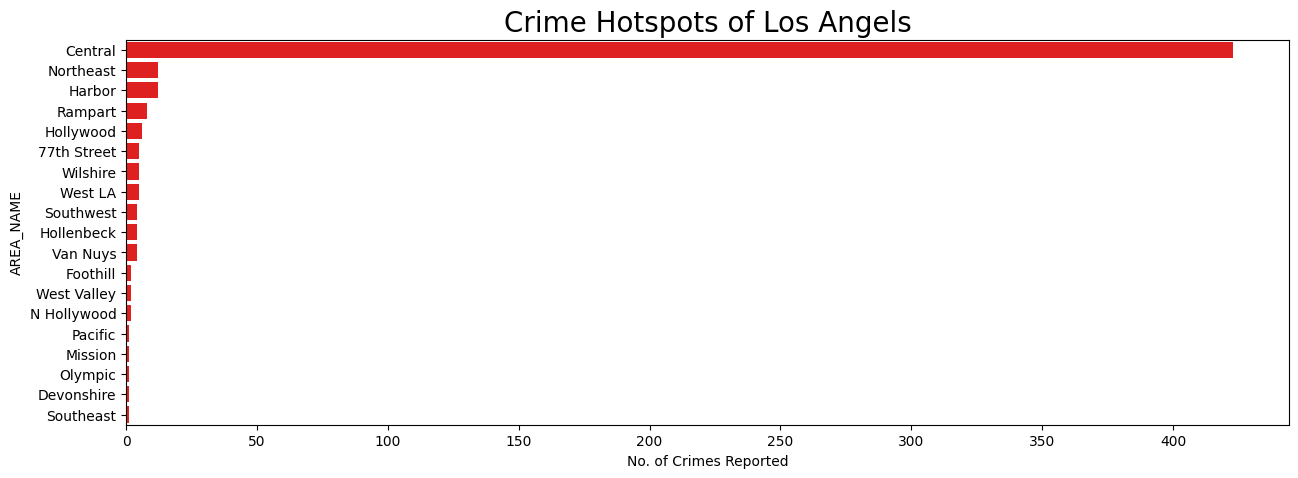

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(df['AREA_NAME'], color='red', order=df['AREA_NAME'].value_counts().index)
plt.title('Crime Hotspots of Los Angels', size=20)
plt.xlabel('No. of Crimes Reported')
plt.show()

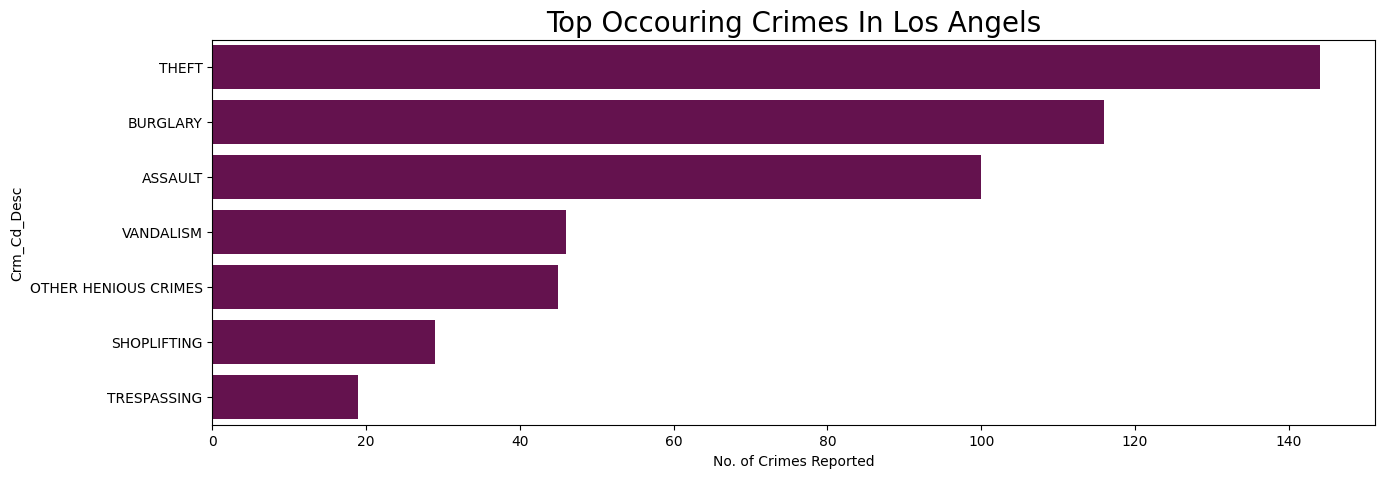

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(df['Crm_Cd_Desc'], color='#720455', order=df['Crm_Cd_Desc'].value_counts().index)
plt.title('Top Occouring Crimes In Los Angels', size=20)
plt.xlabel('No. of Crimes Reported')
plt.show()

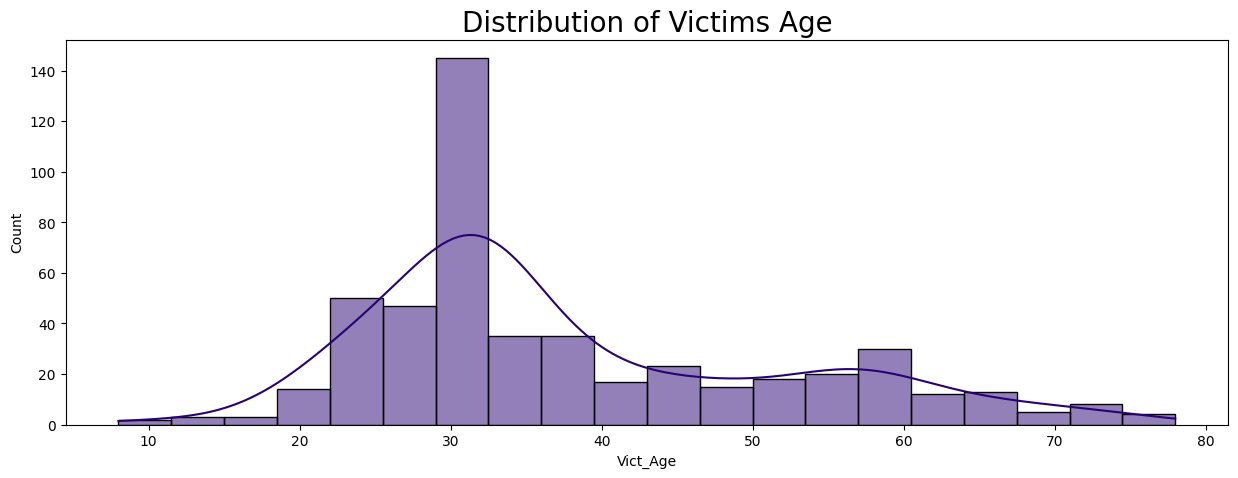

In [44]:
plt.figure(figsize=(15,5))
sns.histplot(df['Vict_Age'], kde=True, color='#280274', bins=20)
plt.title('Distribution of Victims Age', size=20)
plt.show()

In [45]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=df['Vict_Sex'].value_counts().index, values=df['Vict_Sex'].value_counts().values, hole=.25, marker_colors=['#201658','#1D24CA','#98ABEE'])])
fig.update_layout(title_text='Distribution of Victims In Los Angles')
fig.show()

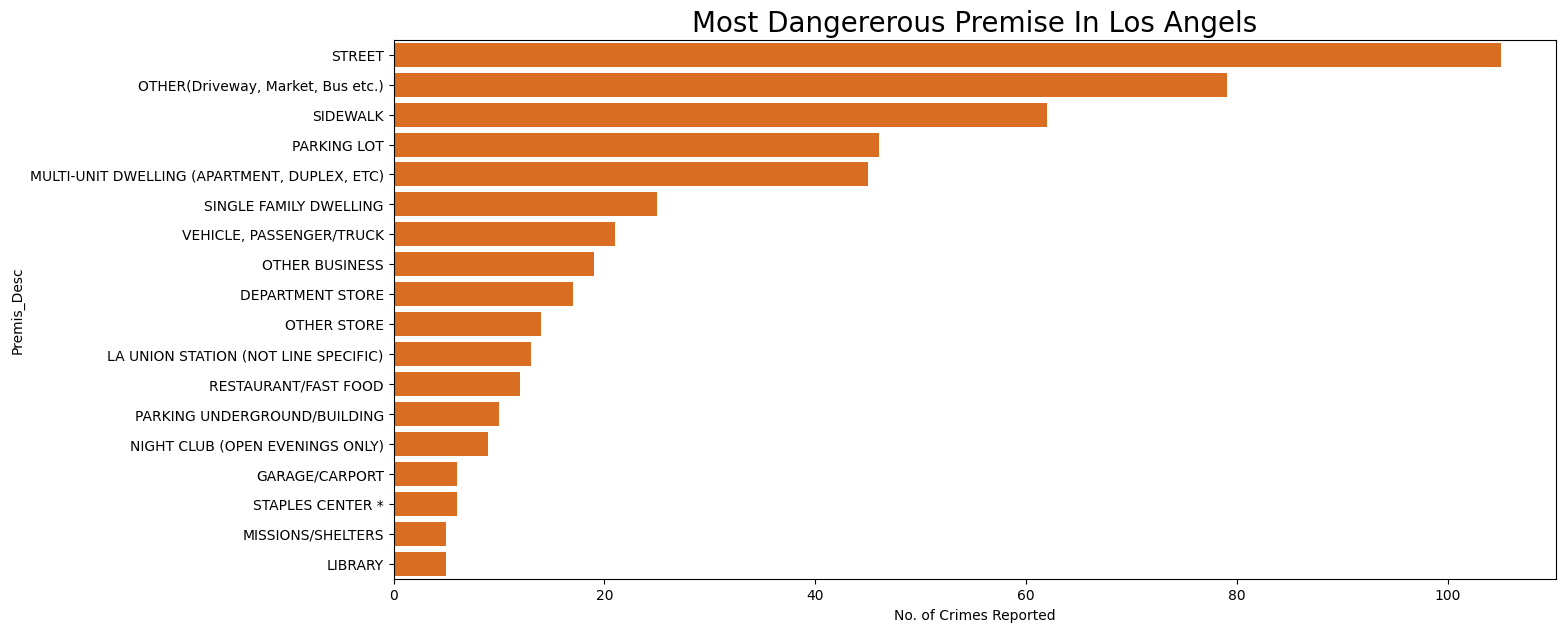

In [46]:
plt.figure(figsize=(15,7))
sns.countplot(df['Premis_Desc'], color='#F76704', order=df['Premis_Desc'].value_counts().index)
plt.title('Most Dangererous Premise In Los Angels', size=20)
plt.xlabel('No. of Crimes Reported')
plt.show()

IC : Individual Crime, AA : Armed Attack, AO : Adult Offense, JO: Juvienile Offense


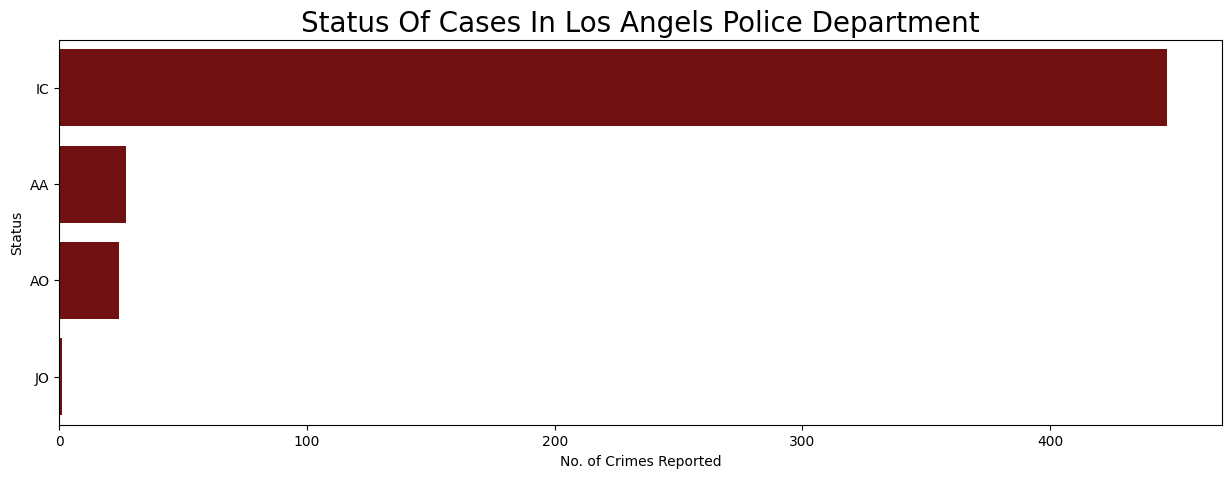

In [47]:
print('IC : Individual Crime, AA : Armed Attack, AO : Adult Offense, JO: Juvienile Offense')
plt.figure(figsize=(15,5))
sns.countplot(df['Status'], color='maroon', order=df['Status'].value_counts().index)
plt.title('Status Of Cases In Los Angels Police Department', size=20)
plt.xlabel('No. of Crimes Reported')
plt.show()

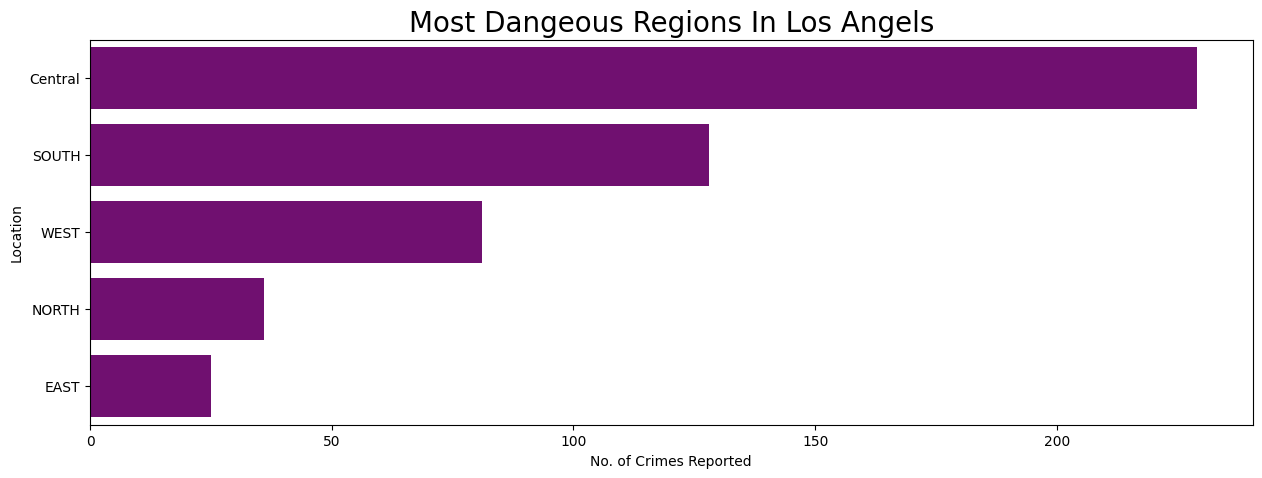

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(df['Location'], color='Purple', order=df['Location'].value_counts().index)
plt.title('Most Dangeous Regions In Los Angels', size=20)
plt.xlabel('No. of Crimes Reported')
plt.show()

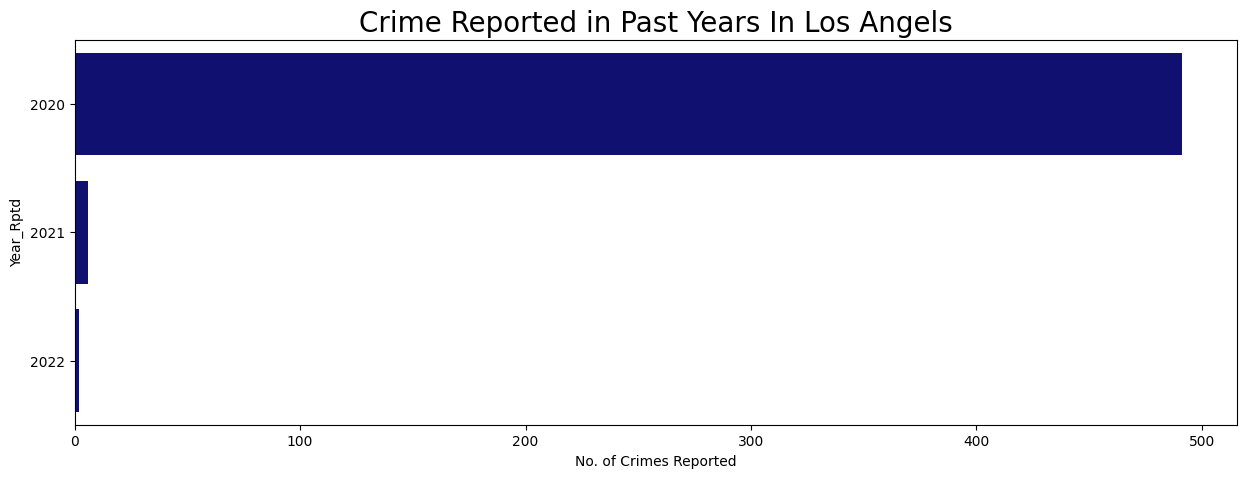

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(y=df['Year_Rptd'], color='navy', order=df['Year_Rptd'].value_counts().index)
plt.title('Crime Reported in Past Years In Los Angels', size=20)
plt.xlabel('No. of Crimes Reported')
plt.show()

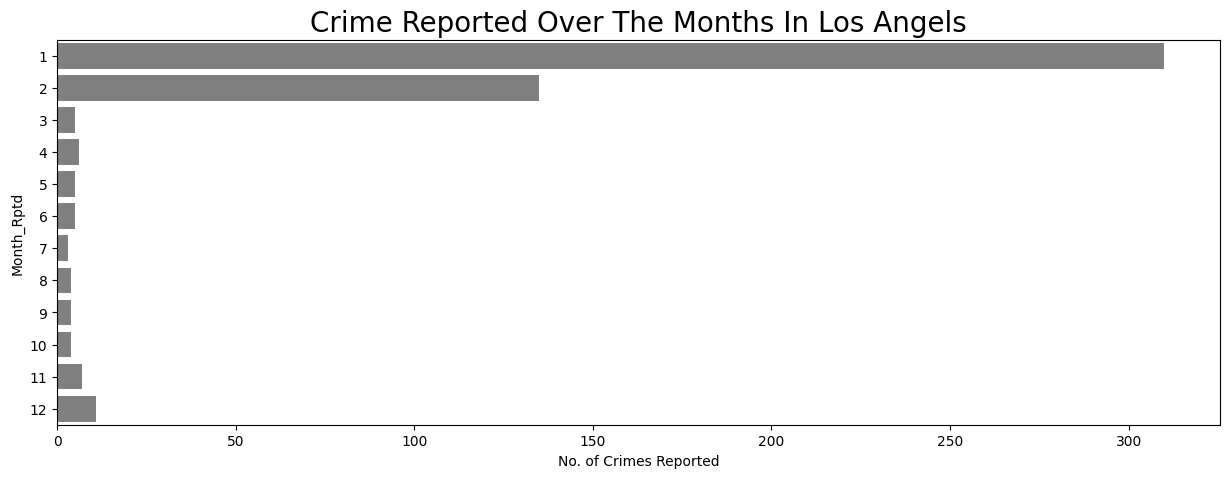

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(y=df['Month_Rptd'], color='Grey')
plt.title('Crime Reported Over The Months In Los Angels', size=20)
plt.xlabel('No. of Crimes Reported')
plt.show()

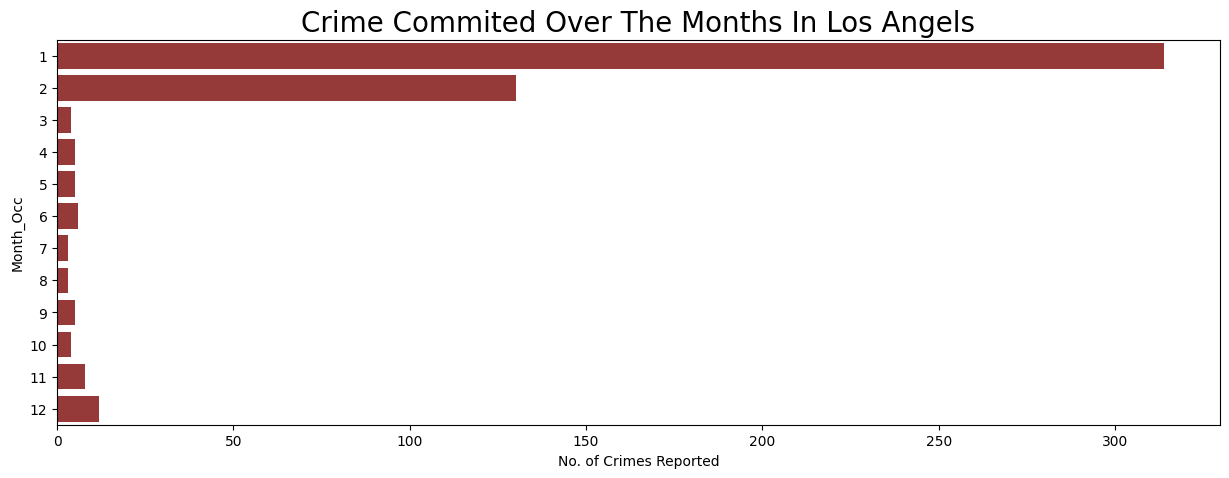

In [51]:
plt.figure(figsize=(15,5))
sns.countplot(y=df['Month_Occ'], color='Brown')
plt.title('Crime Commited Over The Months In Los Angels', size=20)
plt.xlabel('No. of Crimes Reported')
plt.show()

<h1>Bivariate Analysis<h1>

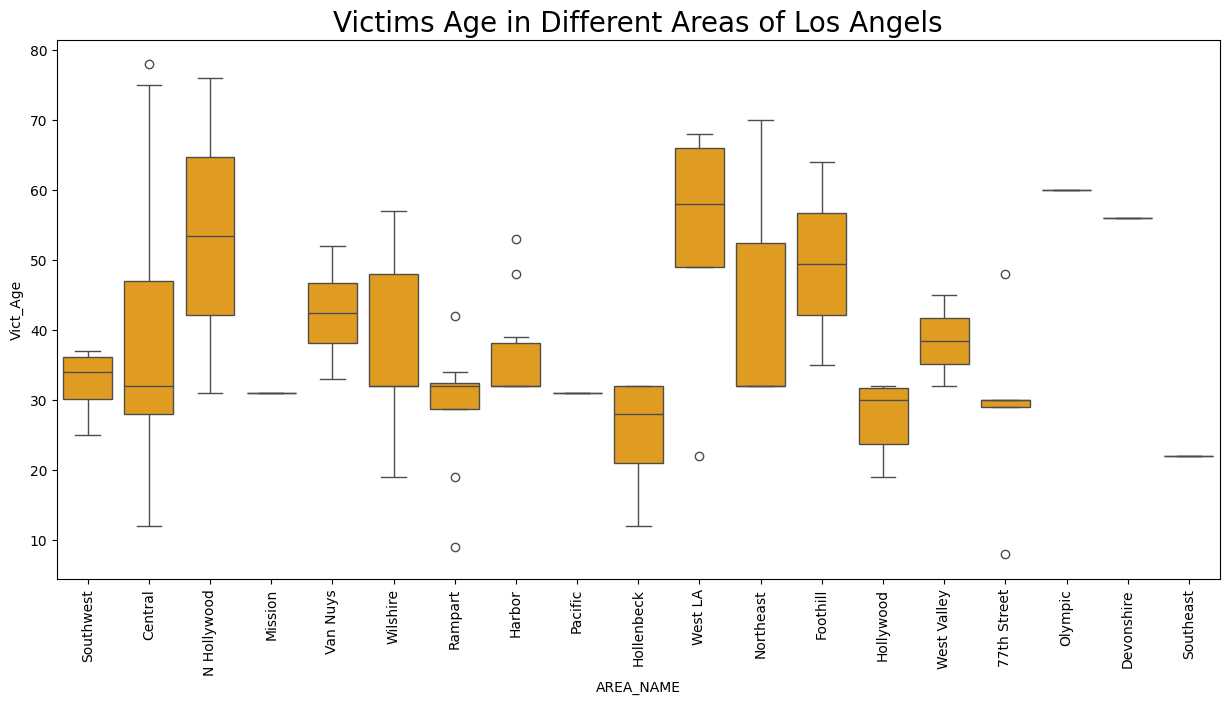

In [52]:
plt.figure(figsize=(15,7))
sns.boxplot(x=df['AREA_NAME'], y=df['Vict_Age'], color = 'orange')
plt.title('Victims Age in Different Areas of Los Angels', size=20)
plt.xticks(rotation=90)
plt.show()

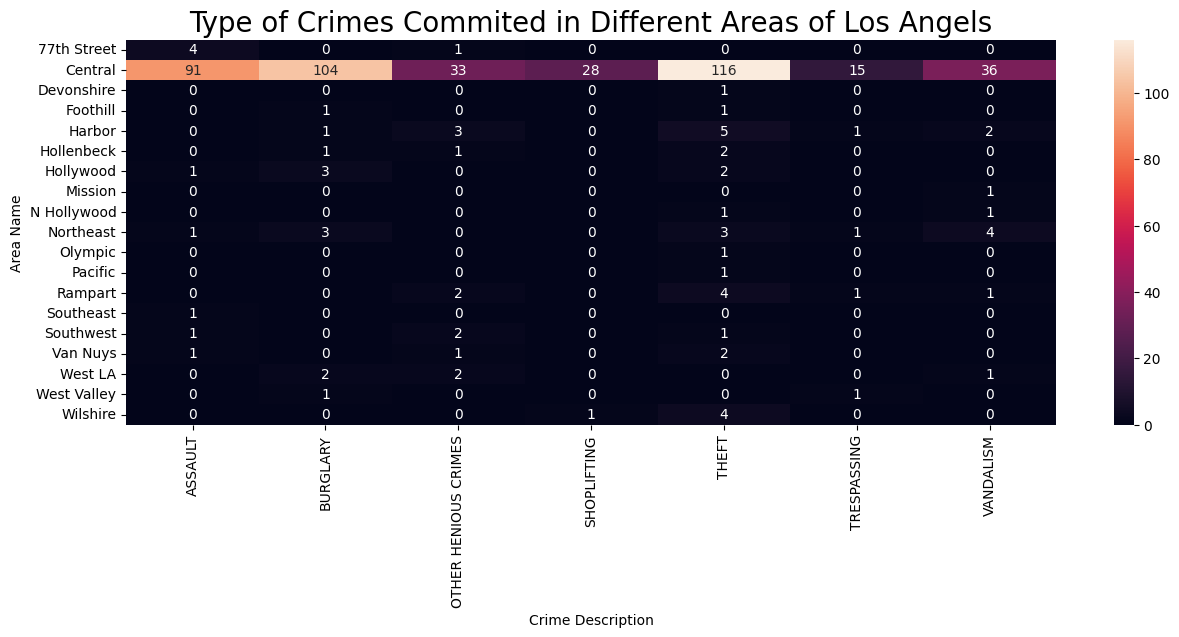

In [53]:

crosstab = pd.crosstab(df['AREA_NAME'], df['Crm_Cd_Desc'])
plt.figure(figsize=(15,5))
sns.heatmap(crosstab,annot=True, fmt='g')
plt.title('Type of Crimes Commited in Different Areas of Los Angels',size=20)
plt.xlabel('Crime Description')
plt.xticks(rotation=90)
plt.ylabel('Area Name')
plt.show()


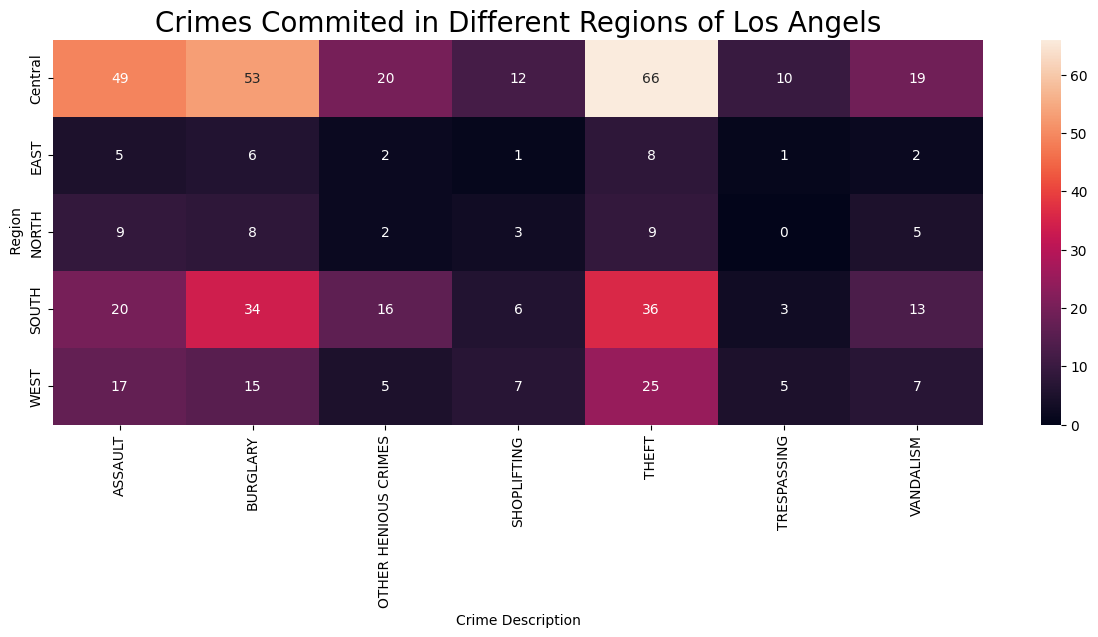

In [54]:

crosstab = pd.crosstab(df['Location'], df['Crm_Cd_Desc'])
plt.figure(figsize=(15,5))
sns.heatmap(crosstab,annot=True, fmt='g')
plt.title('Crimes Commited in Different Regions of Los Angels',size=20)
plt.xlabel('Crime Description')
plt.xticks(rotation=90)
plt.ylabel(' Region')
plt.show()


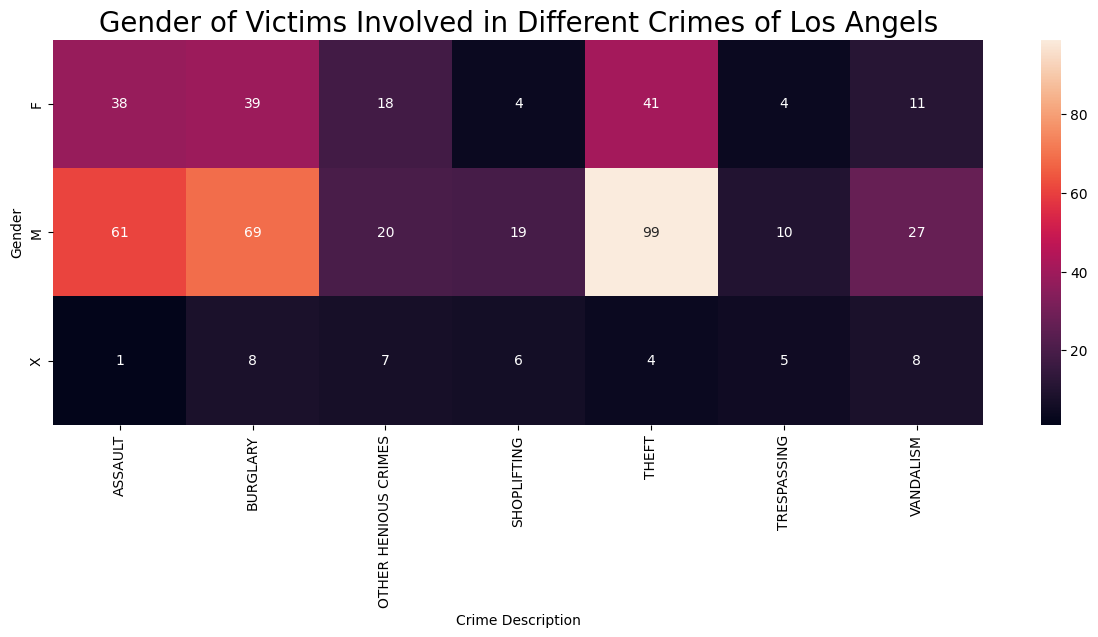

In [55]:
crosstab = pd.crosstab(df['Vict_Sex'], df['Crm_Cd_Desc'])
plt.figure(figsize=(15,5))
sns.heatmap(crosstab,annot=True, fmt='g')
plt.title('Gender of Victims Involved in Different Crimes of Los Angels',size=20)
plt.xlabel('Crime Description')
plt.xticks(rotation=90)
plt.ylabel('Gender')
plt.show()

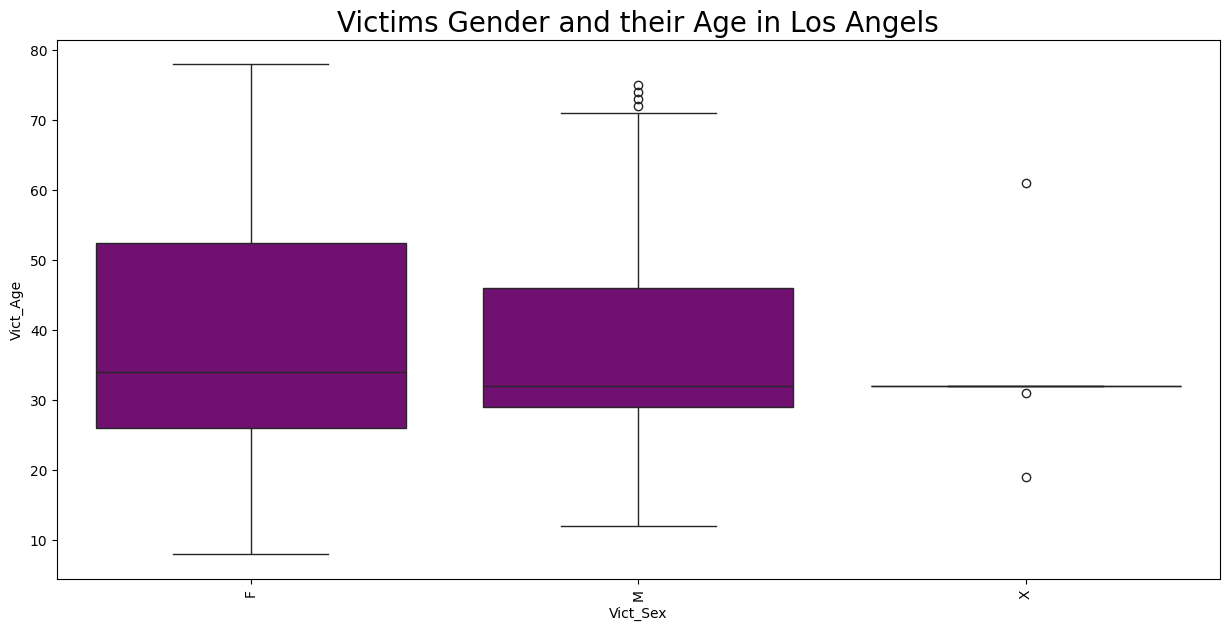

In [56]:
plt.figure(figsize=(15,7))
sns.boxplot(x=df['Vict_Sex'], y=df['Vict_Age'], color='purple')
plt.title('Victims Gender and their Age in Los Angels', size=20)
plt.xticks(rotation=90)
plt.show()

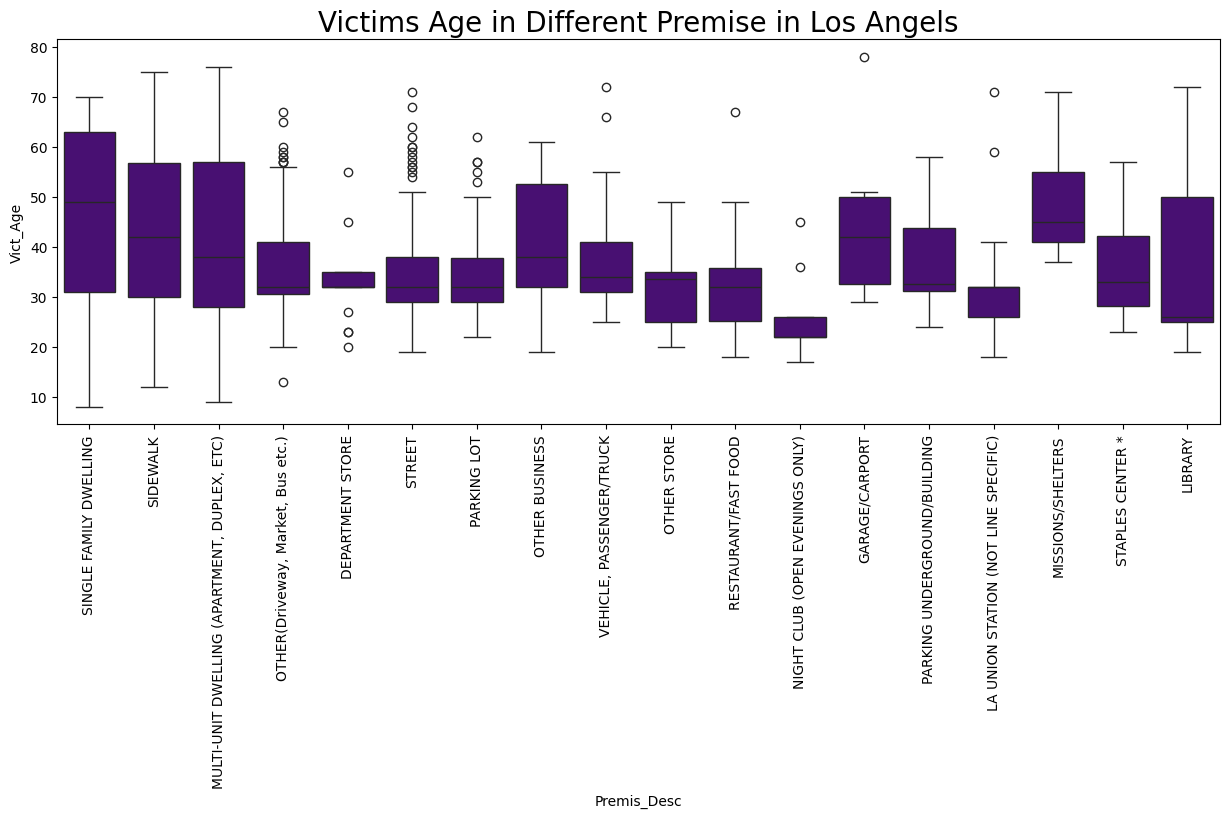

In [57]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['Premis_Desc'], y=df['Vict_Age'], color='indigo')
plt.title('Victims Age in Different Premise in Los Angels', size=20)
plt.xticks(rotation=90)
plt.show()

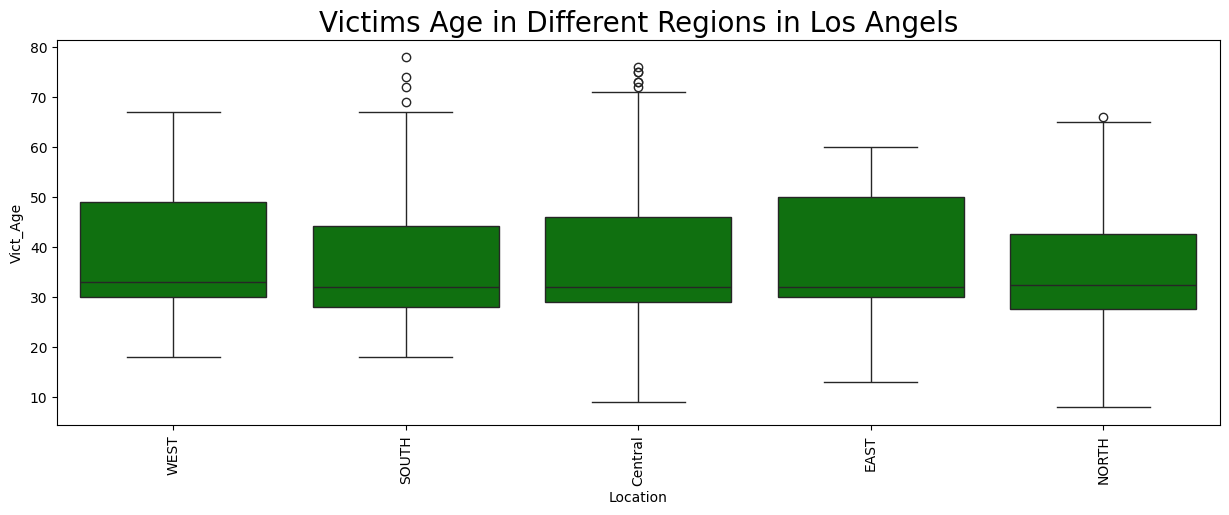

In [58]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['Location'], y=df['Vict_Age'], color='green')
plt.title('Victims Age in Different Regions in Los Angels', size=20)
plt.xticks(rotation=90)
plt.show()

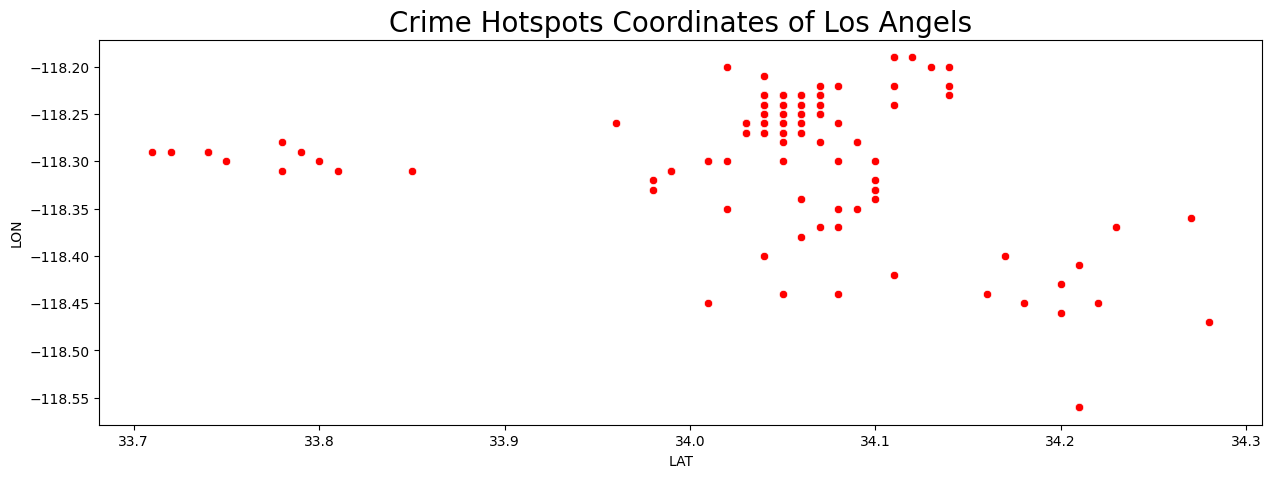

In [59]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['LAT'],y=df['LON'], color='red')
plt.title('Crime Hotspots Coordinates of Los Angels', size=20)
plt.show()

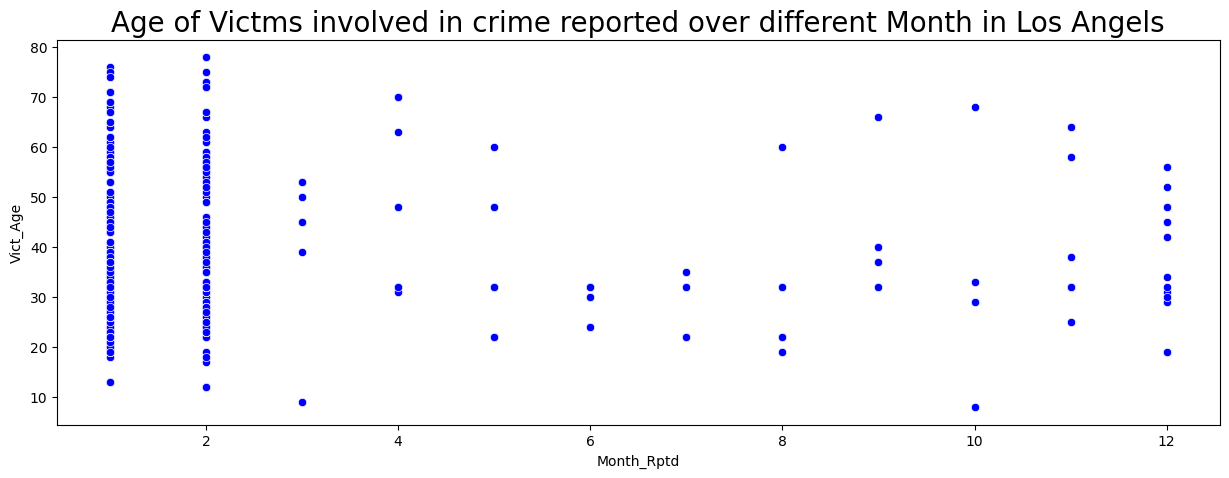

In [60]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['Month_Rptd'],y=df['Vict_Age'], color='blue')
plt.title('Age of Victms involved in crime reported over different Month in Los Angels', size=20)
plt.show()

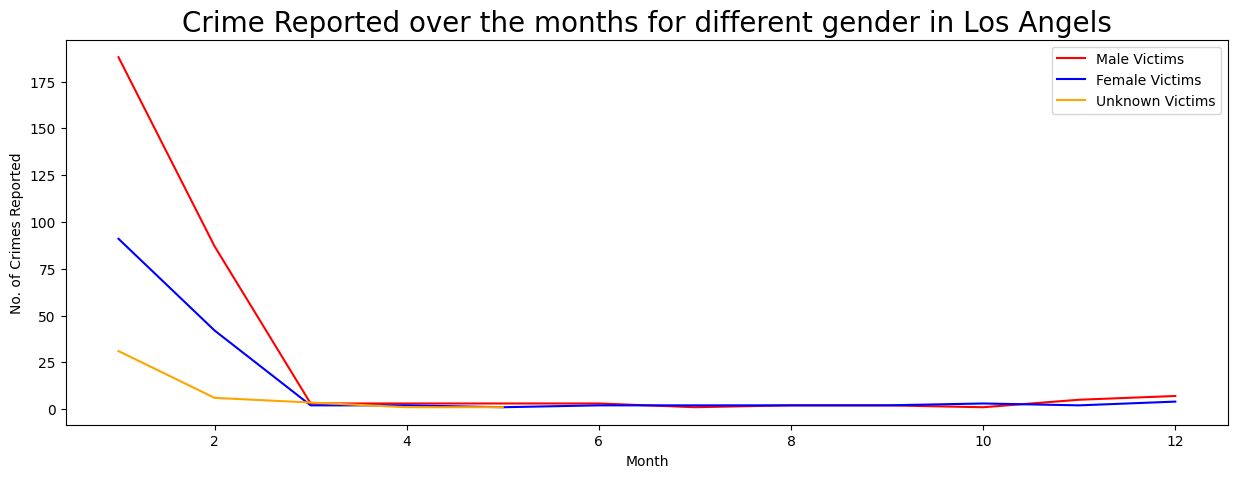

In [61]:
d1=df['Month_Rptd'].where(df['Vict_Sex']=='M').value_counts().sort_index()
d2=df['Month_Rptd'].where(df['Vict_Sex']=='F').value_counts().sort_index()
d3=df['Month_Rptd'].where(df['Vict_Sex']=='X').value_counts().sort_index()

plt.figure(figsize=(15,5))
sns.lineplot(x=d1.index,y=d1.values, label='Male Victims', color='red')
sns.lineplot(x=d2.index,y=d2.values, label='Female Victims', color='blue')
sns.lineplot(x=d3.index,y=d3.values, label='Unknown Victims', color='orange')
plt.title('Crime Reported over the months for different gender in Los Angels', size=20)
plt.xlabel('Month')
plt.ylabel('No. of Crimes Reported')
plt.legend()
plt.show()

<h1>Spatial Analysis<h1>

In [62]:
import folium

crime_map = folium.Map(location=[34.047335, -118.261283], zoom_start=12)

for index, row in df.iterrows():
  popup= folium.Popup(f"Area: {row['AREA_NAME']}, Type: {row['Crm_Cd_Desc']}, Premis: {row['Premis_Desc']} Victim_Gender: {row['Vict_Sex']}, Victim_Age: {row['Vict_Age']}", parse_html=True)
  folium.Marker([row['LAT'], row['LON']], popup=popup).add_to(crime_map)

display(crime_map)